In [37]:
#Import packages
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import proplot as pplt
import cartopy.crs as crs
import cartopy.feature as cfeature
import os
import subprocess as sp
import os
from pathlib import Path 

In [38]:
NEWpred_path='/home/jupyter-dipti/work/AiBEDO_simultaneousPreds_Salva/Data/Predictions/NewRemap_preds/'
pred_path='/home/jupyter-dipti/work/AiBEDO_simultaneousPreds_Salva/Data/ERA5_Preds_nonorm_FNO_simul/'

path = '/home/jupyter-dipti/work/processed/'
indata = xr.open_dataset(path + 'isosph5.nonorm.ERA5_Exp8_Input.nc')
outdataERA5 = xr.open_dataset(path + 'isosph5.nonorm.ERA5_Exp8_Output.nc')

lon=outdataERA5.lon
lat=outdataERA5.lat

lons,lats = np.meshgrid(indata.lon,indata.lat)
OutvarNames=['tas_nonorm','ps_nonorm','pr_nonorm']


In [39]:
newpreds=xr.open_dataset(NEWpred_path+'FNO_trained_on_era5.nc')
preds=xr.open_dataset(pred_path+'FNO_trained_on_ERA5_era5_nonormPred.nc')

#Select a random year
startD='2004-01-01'
endD='2004-12-31'

outdataERA5=outdataERA5.sel(time=slice(startD,endD))
newpreds=newpreds.sel(time=slice(startD,endD))
preds=preds.sel(time=slice(startD,endD))


#Select just January(1), July(7), April(4), October(10)
Jan=[10]
outdataERA5=outdataERA5.where(outdataERA5.time.dt.month.isin(Jan), drop=True)
newpreds=newpreds.where(newpreds.time.dt.month.isin(Jan), drop=True)
preds=preds.where(preds.time.dt.month.isin(Jan), drop=True)

In [40]:
OLDRMSE=[]
for i,varName in enumerate(OutvarNames):
    predvar='pred_'+varName
    preds_data=preds[predvar].copy(deep=True)
    preds_data.values=preds[predvar].values
    predBias=preds_data-outdataERA5[varName]
    predRMSE=predRMSE=(predBias*predBias).mean(dim='time')
    OLDRMSE.append(predRMSE)

In [41]:
NEWRMSE=[]
for i,varName in enumerate(OutvarNames):
    predvar=varName
    preds_data=newpreds[predvar].copy(deep=True)
    preds_data.values=newpreds[predvar].values
    predBias=preds_data-outdataERA5[varName]
    predRMSE=predRMSE=(predBias*predBias).mean(dim='time')
    NEWRMSE.append(predRMSE)

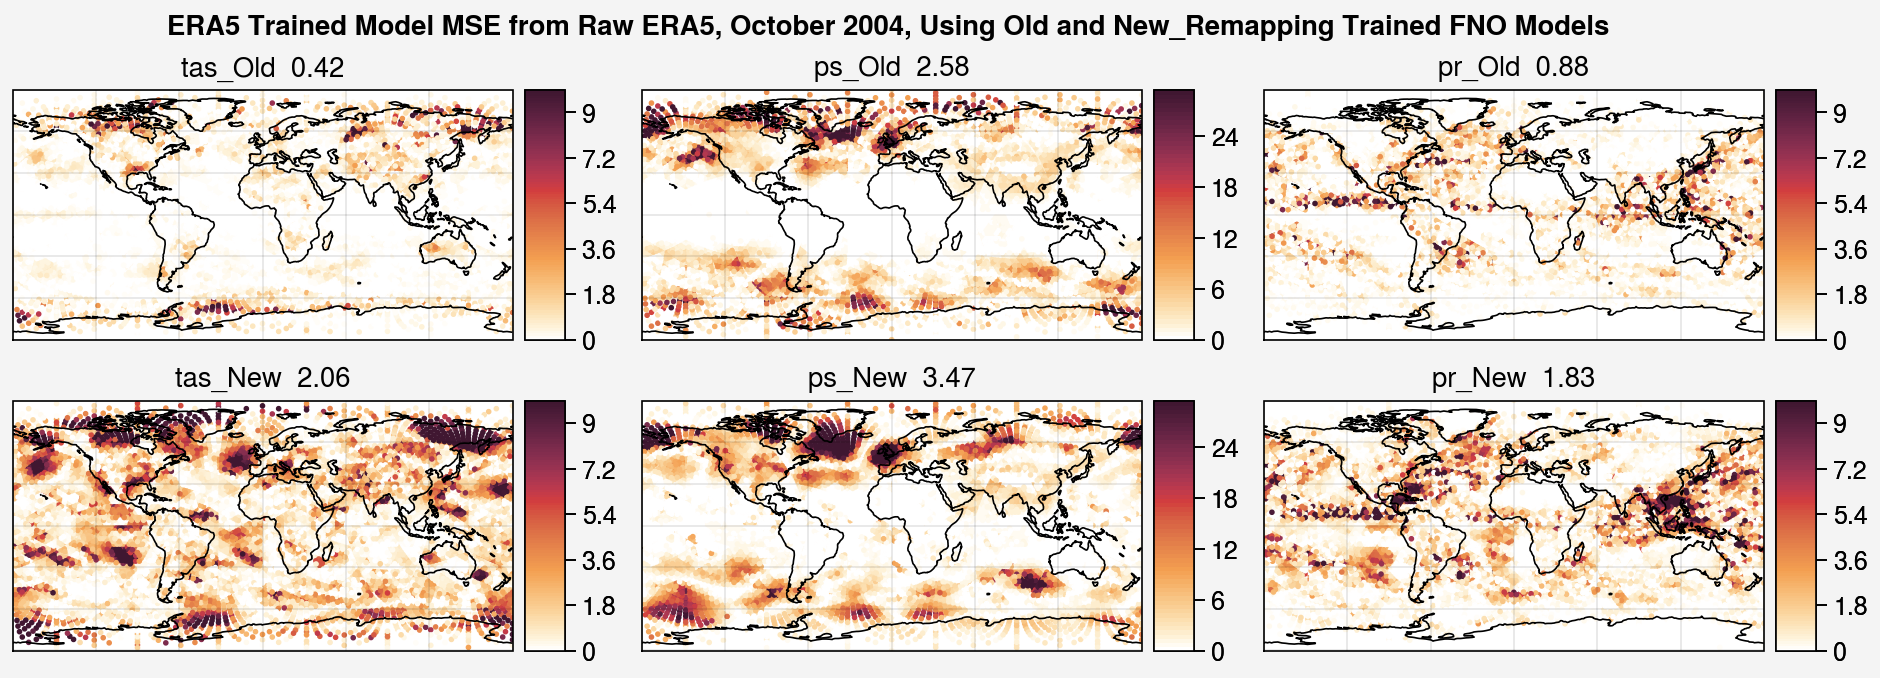

In [42]:
fig,axes=pplt.subplots(nrows=2,ncols=3,proj=crs.PlateCarree())
con=axes[0].scatter(x=lon,y=lat,c=OLDRMSE[0],s=2, transform = crs.PlateCarree(),levels=np.arange(0.0,10,0.1))
cbar=axes[0].colorbar(con, loc='r')
cbar.ax.locator_params(nbins=6)
axes[0].set_title('tas_Old'+"  {:0.2f}".format(OLDRMSE[0].mean().values))

con=axes[1].scatter(x=lon,y=lat,c=OLDRMSE[1],s=2, transform = crs.PlateCarree(),levels=np.arange(0.0,30,0.5))
cbar=axes[1].colorbar(con, loc='r')
cbar.ax.locator_params(nbins=6)
axes[1].set_title('ps_Old'+"  {:0.2f}".format(OLDRMSE[1].mean().values))

con=axes[2].scatter(x=lon,y=lat,c=OLDRMSE[2],s=2, transform = crs.PlateCarree(),levels=np.arange(0.0,10,0.1))
cbar=axes[2].colorbar(con, loc='r')
cbar.ax.locator_params(nbins=6)
axes[2].set_title('pr_Old'+"  {:0.2f}".format(OLDRMSE[2].mean().values),)

con=axes[3].scatter(x=lon,y=lat,c=NEWRMSE[0],s=2, transform = crs.PlateCarree(),levels=np.arange(0.0,10,0.1))
cbar=axes[3].colorbar(con, loc='r')
cbar.ax.locator_params(nbins=6)
axes[3].set_title('tas_New'+"  {:0.2f}".format(NEWRMSE[0].mean().values))

con=axes[4].scatter(x=lon,y=lat,c=NEWRMSE[1],s=2, transform = crs.PlateCarree(),levels=np.arange(0.0,30,0.5))
cbar=axes[4].colorbar(con, loc='r')
cbar.ax.locator_params(nbins=6)
axes[4].set_title('ps_New'+"  {:0.2f}".format(NEWRMSE[1].mean().values))

con=axes[5].scatter(x=lon,y=lat,c=NEWRMSE[2],s=2, transform = crs.PlateCarree(),levels=np.arange(0.0,10,0.1))
cbar=axes[5].colorbar(con, loc='r')
cbar.ax.locator_params(nbins=6)
axes[5].set_title('pr_New'+"  {:0.2f}".format(NEWRMSE[2].mean().values))

fig.format(coast=True)
axes.format(suptitle='ERA5 Trained Model MSE from Raw ERA5, October 2004, Using Old and New_Remapping Trained FNO Models')

fig.save('Oct2004_MSE_ERA5Trained_ERA5Raw_OLD-NEW.png')
